# Importing Libraries

In [1]:
import os
import zipfile

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download & Explore Dataset

* Actual (25,000): https://www.kaggle.com/c/dogs-vs-cats

* Filtered (2,000) : https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-09-15 13:27:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.166.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.166.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   199MB/s    in 0.3s    

2021-09-15 13:27:26 (199 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
zipref = zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip', 'r')
zipref.extractall('/tmp')
zipref.close()

In [4]:
!ls /tmp | grep cats

cats_and_dogs_filtered
cats_and_dogs_filtered.zip


In [5]:
!ls /tmp/cats_and_dogs_filtered/

train  validation  vectorize.py


In [6]:
base_dir = '/tmp/cats_and_dogs_filtered/'

train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validation/')

print(base_dir, train_dir, validation_dir)

/tmp/cats_and_dogs_filtered/ /tmp/cats_and_dogs_filtered/train/ /tmp/cats_and_dogs_filtered/validation/


In [7]:
!ls /tmp/cats_and_dogs_filtered/train/

cats  dogs


In [8]:
train_cats_dir = os.path.join(train_dir, 'cats/')
train_dogs_dir = os.path.join(train_dir, 'dogs/')

validation_cats_dir = os.path.join(validation_dir, 'cats/')
validation_dogs_dir = os.path.join(validation_dir, 'dogs/')

In [9]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

print(train_cats_fnames[:5])
print(train_dogs_fnames[:5])
print(validation_cats_fnames[:5])
print(validation_dogs_fnames[:5])

['cat.275.jpg', 'cat.507.jpg', 'cat.609.jpg', 'cat.357.jpg', 'cat.183.jpg']
['dog.684.jpg', 'dog.152.jpg', 'dog.387.jpg', 'dog.340.jpg', 'dog.364.jpg']
['cat.2035.jpg', 'cat.2083.jpg', 'cat.2132.jpg', 'cat.2486.jpg', 'cat.2006.jpg']
['dog.2112.jpg', 'dog.2132.jpg', 'dog.2141.jpg', 'dog.2474.jpg', 'dog.2111.jpg']


In [10]:
print('Total Training cat images: ', len(train_cats_fnames))
print('Total Training dog images: ', len(train_dogs_fnames))
print('Total validation cat images: ', len(validation_cats_fnames))
print('Total validation dog images: ', len(validation_dogs_fnames))


Total Training cat images:  1000
Total Training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500


# Visualize Images

In [11]:
nrows = 4
ncols = 4
pic_index = 0

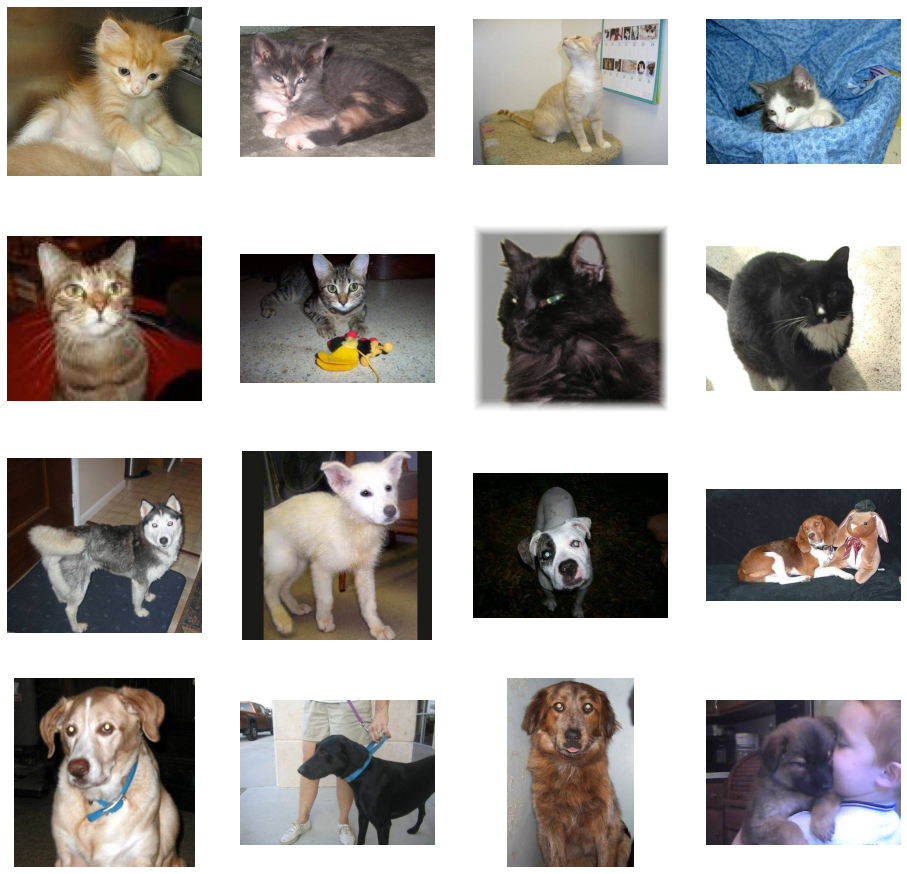

In [12]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_cat_pics = [os.path.join(train_cats_dir, fname) for fname in train_cats_fnames[pic_index-8:pic_index]]
next_dog_pics = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_fnames[pic_index-8:pic_index]]

for i, image_path in enumerate(next_cat_pics + next_dog_pics):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(image_path)
  plt.imshow(img)

plt.show()

# Data Preprocessing

In [13]:
train_data_gen = ImageDataGenerator(rescale=1/255.0)
validation_data_gen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_data_gen.flow_from_directory(directory=train_dir,
                                                     target_size=(150, 150),
                                                     class_mode='binary',
                                                     batch_size=20)

validation_generator = validation_data_gen.flow_from_directory(directory=validation_dir,
                                                          target_size=(150, 150),
                                                          class_mode='binary',
                                                          batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Design and Train the Model

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics =['accuracy']
)

In [17]:
len(train_generator), len(validation_generator)

(100, 50)

In [18]:
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=100,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 40s 115ms/step - loss: 0.7501 - accuracy: 0.5170 - val_loss: 0.6909 - val_accuracy: 0.5040
Epoch 2/100
100/100 [==============================] - 11s 115ms/step - loss: 0.7142 - accuracy: 0.5600 - val_loss: 1.2802 - val_accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 11s 114ms/step - loss: 0.6682 - accuracy: 0.6350 - val_loss: 0.7122 - val_accuracy: 0.5690
Epoch 4/100
100/100 [==============================] - 11s 115ms/step - loss: 0.6098 - accuracy: 0.6835 - val_loss: 0.6147 - val_accuracy: 0.6640
Epoch 5/100
100/100 [==============================] - 11s 114ms/step - loss: 0.5591 - accuracy: 0.7235 - val_loss: 0.5798 - val_accuracy: 0.7070
Epoch 6/100
100/100 [==============================] - 12s 115ms/step - loss: 0.5059 - accuracy: 0.7505 - val_loss: 0.5854 - val_accuracy: 0.7000
Epoch 7/100
100/100 [==============================] - 12s 115ms/step - loss: 0.4445 - accuracy: 0.7940 - val_loss: 0.6635 -

In [19]:
model.evaluate(validation_generator)

50/50 [==============================] - 3s 69ms/step - loss: 11.5620 - accuracy: 0.7280


[11.561975479125977, 0.7279999852180481]

# Evaluate LOSS & ACCURACY

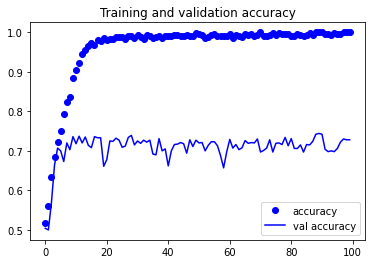

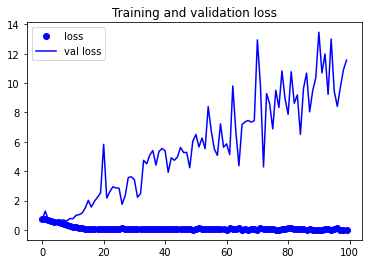

In [20]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc , 'bo', label='accuracy')
plt.plot  ( epochs, val_acc , 'b', label='val accuracy')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss , 'bo', label='loss')
plt.plot  ( epochs, val_loss , 'b', label='val loss')
plt.title ('Training and validation loss'   )
plt.legend()

# **AUGMENTATION**

In [22]:
train_data_gen = ImageDataGenerator(rescale=1/255.0,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
validation_data_gen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_data_gen.flow_from_directory(directory=train_dir,
                                                     target_size=(150, 150),
                                                     class_mode='binary',
                                                     batch_size=20)

validation_generator = validation_data_gen.flow_from_directory(directory=validation_dir,
                                                          target_size=(150, 150),
                                                          class_mode='binary',
                                                          batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics =['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [24]:
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=100,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 23s 217ms/step - loss: 0.7571 - accuracy: 0.5120 - val_loss: 0.6814 - val_accuracy: 0.4990
Epoch 2/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6956 - accuracy: 0.5445 - val_loss: 0.6540 - val_accuracy: 0.5800
Epoch 3/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6684 - accuracy: 0.6095 - val_loss: 0.6152 - val_accuracy: 0.6500
Epoch 4/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6646 - accuracy: 0.6370 - val_loss: 0.8060 - val_accuracy: 0.5150
Epoch 5/100
100/100 [==============================] - 21s 215ms/step - loss: 0.6441 - accuracy: 0.6410 - val_loss: 0.5821 - val_accuracy: 0.6920
Epoch 6/100
100/100 [==============================] - 21s 215ms/step - loss: 0.6319 - accuracy: 0.6550 - val_loss: 0.5813 - val_accuracy: 0.7020
Epoch 7/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6149 - accuracy: 0.6770 - val_loss: 0.5874 -

In [26]:
model.evaluate(validation_generator)

50/50 [==============================] - 3s 69ms/step - loss: 0.6792 - accuracy: 0.7910


[0.6792243719100952, 0.7910000085830688]

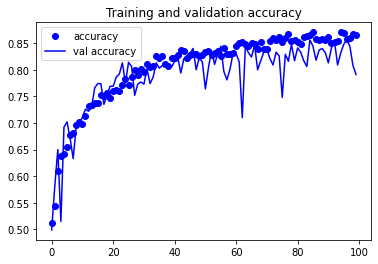

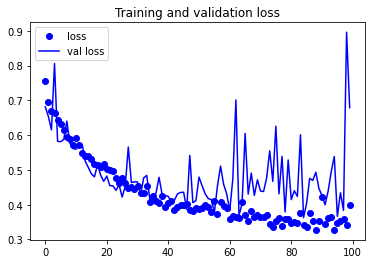

In [25]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc , 'bo', label='accuracy')
plt.plot  ( epochs, val_acc , 'b', label='val accuracy')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss , 'bo', label='loss')
plt.plot  ( epochs, val_loss , 'b', label='val loss')
plt.title ('Training and validation loss'   )
plt.legend()

# Testing the Model

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")